In [49]:
import pandas as pd
df= pd.read_csv('svm.csv')
df.head()

,Feature1,Feature2,Label
0,5.993428,4.276577,Class_A
1,4.723471,7.418845,Class_A
2,6.295377,8.759183,Class_A
3,8.046060,15.663063,Class_C
4,4.531693,11.669659,Class_B


In [50]:
from sklearn.preprocessing import OrdinalEncoder
sc=OrdinalEncoder(categories=[['Class_A','Class_B','Class_C']])
df['label']=sc.fit_transform(df[['Label']])


In [51]:
df


,Feature1,Feature2,Label,label
0,5.993428,4.276577,Class_A,0.0
1,4.723471,7.418845,Class_A,0.0
2,6.295377,8.759183,Class_A,0.0
3,8.046060,15.663063,Class_C,2.0
4,4.531693,11.669659,Class_B,1.0
...,...,...,...,...
2995,5.154961,10.514408,Class_A,0.0
2996,5.515505,13.457944,Class_B,1.0
2997,2.516479,6.347789,Class_A,0.0
2998,5.668353,11.403851,Class_B,1.0


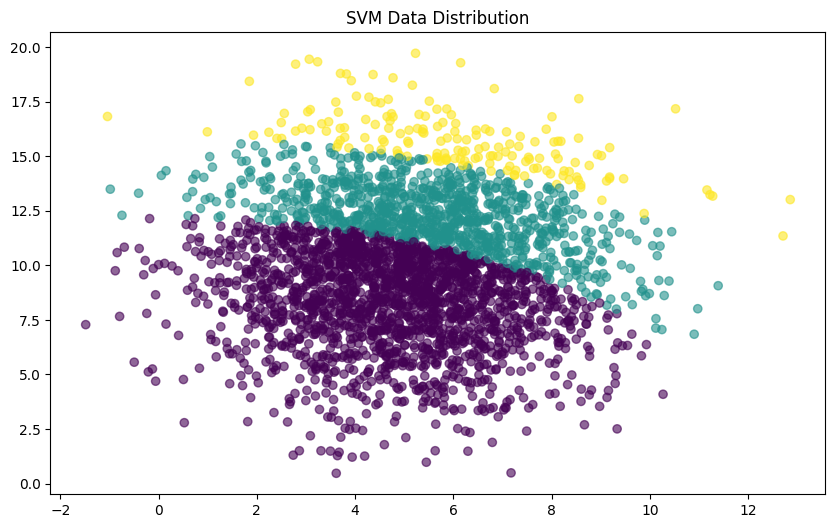

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title('SVM Data Distribution')
plt.scatter(df['Feature1'], df['Feature2'], c=df['label'], cmap='viridis', alpha=0.6)
plt.show()

In [53]:
x=df[['Feature1', 'Feature2']]
y=df['label']

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [55]:
from sklearn import svm
model = svm.SVC()
model.fit(x_train, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [56]:
y_pred = model.predict(x_test)

In [57]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9883333333333333
F1 Score: 0.9882656581030256
Confusion Matrix:
 [[366   0   0]
 [  5 196   0]
 [  0   2  31]]


Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       366
         1.0       0.99      0.98      0.98       201
         2.0       1.00      0.94      0.97        33

    accuracy                           0.99       600
   macro avg       0.99      0.97      0.98       600
weighted avg       0.99      0.99      0.99       600



In [58]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
list_of_kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in list_of_kernels:
    model = SVC(kernel=kernel)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy_score(y_test, predictions)}\n")

Kernel: linear
Accuracy: 0.9683333333333334

Kernel: poly
Accuracy: 0.995

Kernel: rbf
Accuracy: 0.9883333333333333

Kernel: sigmoid
Accuracy: 0.35

